In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data = iris.data,columns=iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


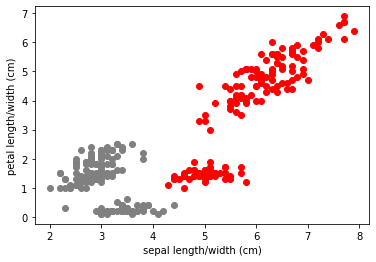

In [3]:
plt.scatter(x=iris_df['sepal length (cm)'], y= iris_df['petal length (cm)'],c='red')
plt.scatter(x=iris_df['sepal width (cm)'], y= iris_df['petal width (cm)'],c='gray')

plt.xlabel('sepal length/width (cm)')
plt.ylabel("petal length/width (cm)")
plt.show()

In [4]:
def Calculate_distance(data,centroid):
    return cdist(data, centroid ,'euclidean')

In [5]:
def K_mean(train_data,k,iterations):
    # randomly inistialize centroids and cluster accourding to min distance 
    idx = np.random.choice(len(train_data),k,replace=False)
    centroids = train_data.iloc[idx,:]
    distances = Calculate_distance(train_data,centroids)
    points = np.array([np.argmin(i) for i in distances])
    
    for c in range(iterations):
        # update centroids to get best centroids for clustering
        centroids = []
        for idx in range(k):
            updated_centroids = train_data[points == idx].mean(axis=0)
            centroids.append(updated_centroids)
        centroids = np.vstack(centroids)
        distances = Calculate_distance(train_data,centroids)
        points = np.array([np.argmin(i) for i in distances])
        # Calculate cost of k-mean 
        sum_list = []
        for kk in range(k):
            summation = ((abs(np.linalg.norm(train_data[points == kk]) - np.linalg.norm(centroids[kk])))**2).sum()
            sum_list.append(summation)
        cost = sum(sum_list)/len(train_data)
    return points, cost

In [6]:
iterations = 30
k = 3
kclusters , cost = K_mean(iris_df,k,iterations)


Visiualize the clusters

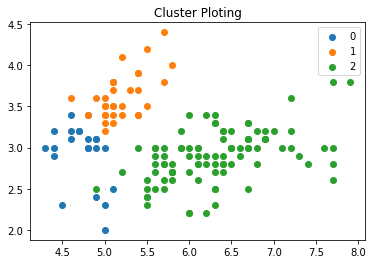

In [7]:
unique_kclusers = np.unique(kclusters)
for i in unique_kclusers:
    plt.scatter(iris_df.iloc[kclusters == i , 0] , iris_df.iloc[kclusters == i , 1] , label = i)
plt.title("Cluster Ploting")
plt.legend()
plt.show()

For choosing best number of cluster for a dataser i used Elbow method

In [8]:
cost_list = []
for i in range(1,5):
    kclusters , cost = K_mean(iris_df,i,iterations)
    cost_list.append(cost)

In [9]:
cost_list

[53.98165022706523, 50.55502362014598, 46.77061682826166, 45.53265697665379]

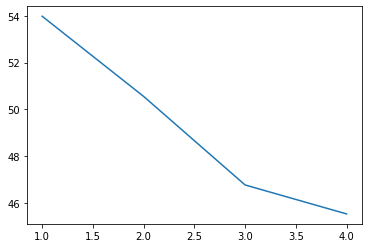

In [10]:
k_list = np.arange(1,5)
plt.plot(k_list,cost_list)
plt.show()

Best Number of Clusters  = 3